In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Load the transformed data
transformed_df = pd.read_csv('transformed_economic_data.csv', index_col='DATE', parse_dates=True)

# Replace infinite values with NaN
transformed_df = transformed_df.replace([np.inf, -np.inf], np.nan)

# Impute NaN values with mean
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(transformed_df)

# Normalize the data using StandardScaler
scaler = StandardScaler()
normalized_data = scaler.fit_transform(imputed_data)

# Function to perform K-means clustering and calculate silhouette score
def kmeans_silhouette(data, max_clusters=10):
    silhouette_scores = []
    inertias = []
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        inertias.append(kmeans.inertia_)
    return silhouette_scores, inertias

# Calculate silhouette scores and inertias for different numbers of clusters
silhouette_scores, inertias = kmeans_silhouette(imputed_data)

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, len(silhouette_scores) + 2), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.savefig('silhouette_scores_2.png')
plt.close()

# Plot inertia (elbow method)
plt.figure(figsize=(10, 6))
plt.plot(range(2, len(inertias) + 2), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.savefig('inertia_elbow_2.png')
plt.close()

print("Silhouette scores and inertia plots have been saved.")

Silhouette scores and inertia plots have been saved.


Cluster Means:
         Consumer_sentiment  CPI_Urban_consumers  Implicit_price_deflator  \
Cluster                                                                     
0                  0.003631             0.008434                -0.030409   
1                  0.012177             0.012173                -0.237328   
2                 -0.000704             0.010535                 0.076207   
3                  0.023093             0.006109                 0.010966   

         Industrial_production  Labor_Productivity       PPI  \
Cluster                                                        
0                     0.005033            0.023478  0.007806   
1                    -0.020662          -20.000000  0.008731   
2                     0.008178           -2.566200  0.013225   
3                     0.008658            3.666667 -0.003393   

         Real_disposable_Personal_income  Real_GDP  Unemployment_rate  
Cluster                                                          

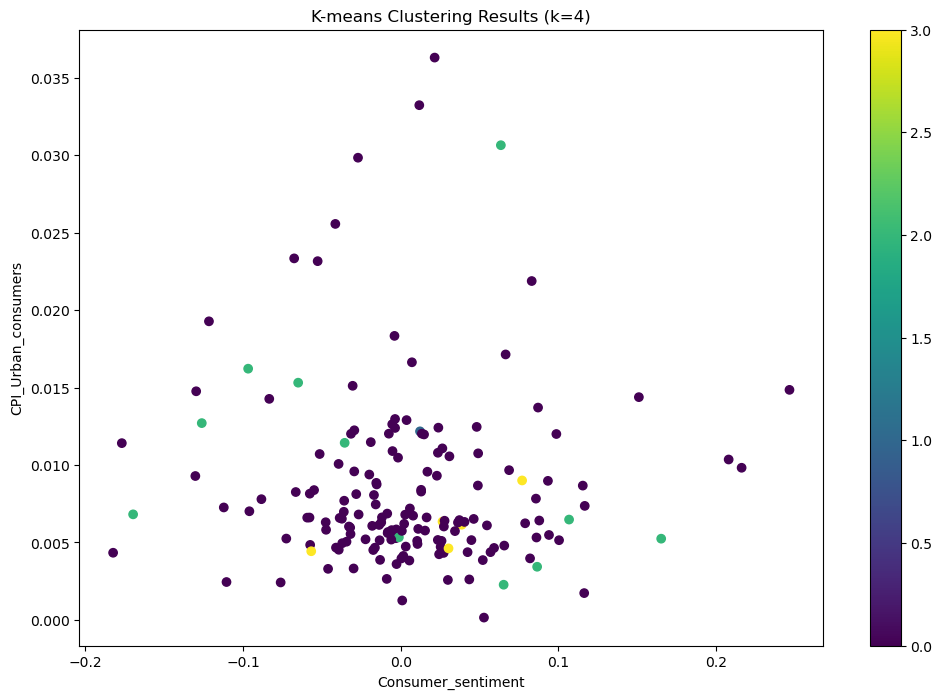

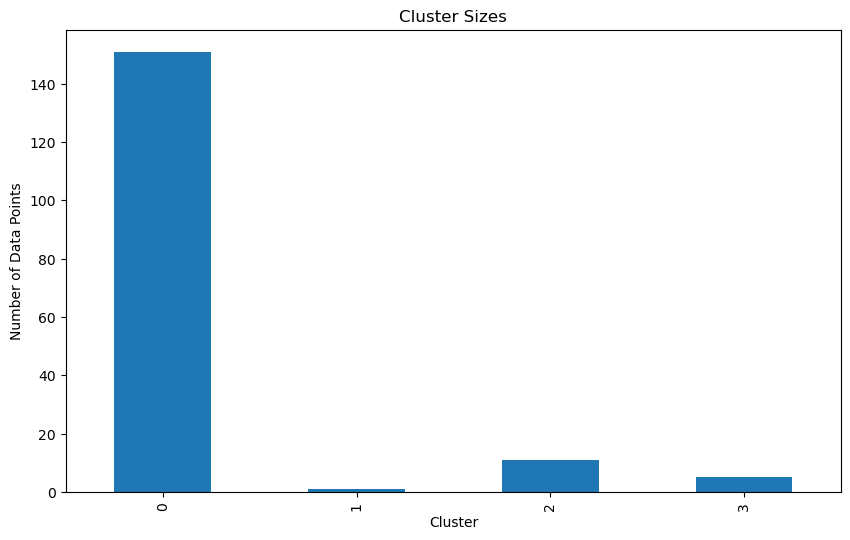

In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the transformed data
transformed_df = pd.read_csv('transformed_economic_data.csv', index_col='DATE', parse_dates=True)

# Replace infinite values with NaN and drop rows with NaN
transformed_df = transformed_df.replace([np.inf, -np.inf], np.nan).dropna()

def perform_kmeans(data, n_clusters=4):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(data)
    
    # Add cluster labels to the dataframe
    data_with_clusters = data.copy()
    data_with_clusters['Cluster'] = cluster_labels
    
    # Calculate cluster means
    cluster_means = data_with_clusters.groupby('Cluster').mean()
    
    return cluster_means, cluster_labels

# Perform K-means clustering
n_clusters = 4  # You can adjust this value
cluster_means, cluster_labels = perform_kmeans(transformed_df, n_clusters)

print("Cluster Means:")
print(cluster_means)

# Visualize clusters using first two features
plt.figure(figsize=(12, 8))
scatter = plt.scatter(transformed_df.iloc[:, 0], transformed_df.iloc[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel(transformed_df.columns[0])
plt.ylabel(transformed_df.columns[1])
plt.title(f'K-means Clustering Results (k={n_clusters})')
plt.colorbar(scatter)
plt.show()

# Plot cluster sizes
cluster_sizes = pd.Series(cluster_labels).value_counts().sort_index()
plt.figure(figsize=(10, 6))
cluster_sizes.plot(kind='bar')
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.show()

Cluster Means (Normalized Data):
         Consumer_sentiment  CPI_Urban_consumers  Implicit_price_deflator  \
Cluster                                                                     
0                 -0.279328             1.818568                 0.049373   
1                  0.125940             0.114362                -0.944467   
2                 -0.562354             0.057413                 0.060634   
3                  0.036724            -0.283272                 0.053880   

         Industrial_production  Labor_Productivity       PPI  \
Cluster                                                        
0                    -0.103530            0.060977  1.012688   
1                    -1.781806            0.060977 -1.648543   
2                     0.028234          -15.914969  0.060570   
3                     0.131850            0.060977 -0.046123   

         Real_disposable_Personal_income  Real_GDP  Unemployment_rate  
Cluster                                        

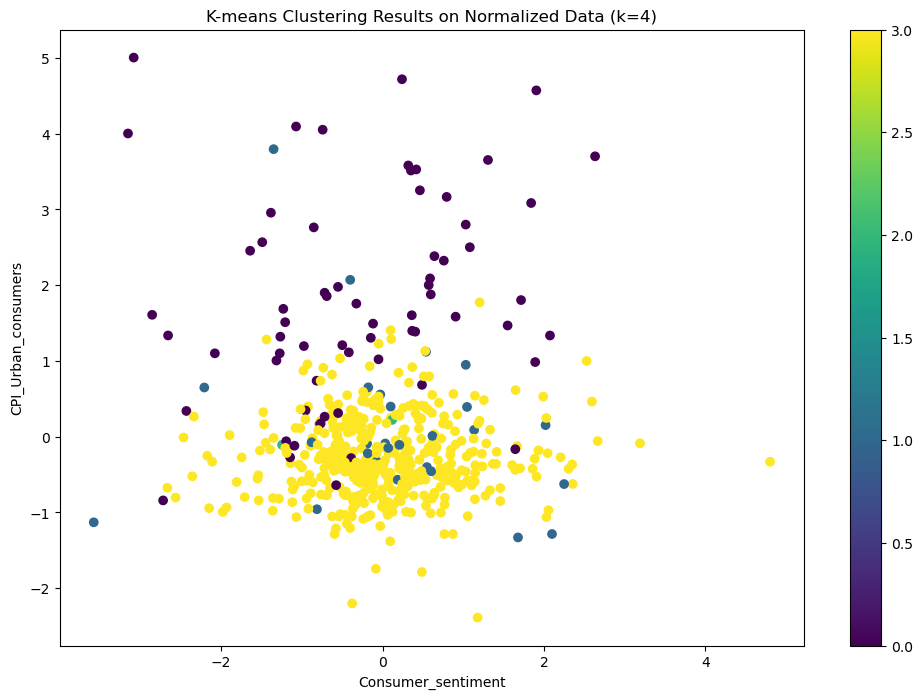

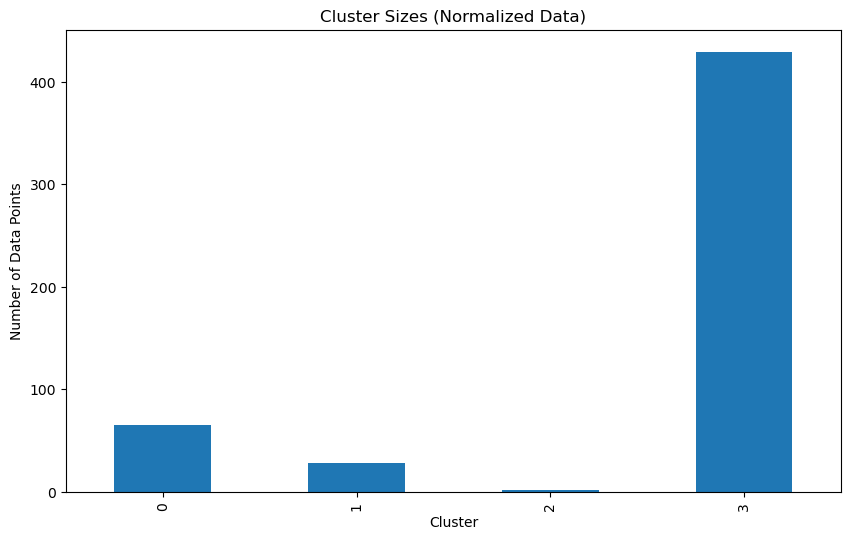


Percentage of data points in each cluster:
0    12.40
1     5.34
2     0.38
3    81.87
Name: count, dtype: float64

Cluster Summary:

Cluster 0:
Number of data points: 65 (12.4%)
Top features (absolute value):
  CPI_Urban_consumers: 1.82
  PPI: 1.01
  Real_disposable_Personal_income: -0.50

Cluster 1:
Number of data points: 28 (5.34%)
Top features (absolute value):
  Real_GDP: -1.90
  Industrial_production: -1.78
  PPI: -1.65

Cluster 2:
Number of data points: 2 (0.38%)
Top features (absolute value):
  Labor_Productivity: -15.91
  Consumer_sentiment: -0.56
  Real_GDP: 0.42

Cluster 3:
Number of data points: 429 (81.87%)
Top features (absolute value):
  CPI_Urban_consumers: -0.28
  Real_GDP: 0.18
  Industrial_production: 0.13


In [15]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the transformed data
transformed_df = pd.read_csv('interploation_transformed_economic_data.csv', index_col='DATE', parse_dates=True)

# Replace infinite values with NaN and drop rows with NaN
transformed_df = transformed_df.replace([np.inf, -np.inf], np.nan).dropna()

# Normalize the data using StandardScaler
scaler = StandardScaler()
normalized_data = scaler.fit_transform(transformed_df)
normalized_df = pd.DataFrame(normalized_data, columns=transformed_df.columns, index=transformed_df.index)

def perform_kmeans(data, n_clusters=4):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(data)
    
    # Add cluster labels to the dataframe
    data_with_clusters = data.copy()
    data_with_clusters['Cluster'] = cluster_labels
    
    # Calculate cluster means
    cluster_means = data_with_clusters.groupby('Cluster').mean()
    
    return cluster_means, cluster_labels

# Perform K-means clustering on normalized data
n_clusters = 4

cluster_means, cluster_labels = perform_kmeans(normalized_df, n_clusters)

print("Cluster Means (Normalized Data):")
print(cluster_means)

# Visualize clusters using first two features
plt.figure(figsize=(12, 8))
scatter = plt.scatter(normalized_df.iloc[:, 0], normalized_df.iloc[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel(normalized_df.columns[0])
plt.ylabel(normalized_df.columns[1])
plt.title(f'K-means Clustering Results on Normalized Data (k={n_clusters})')
plt.colorbar(scatter)
plt.show()

# Plot cluster sizes
cluster_sizes = pd.Series(cluster_labels).value_counts().sort_index()
plt.figure(figsize=(10, 6))
cluster_sizes.plot(kind='bar')
plt.title('Cluster Sizes (Normalized Data)')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.show()

# Calculate and print the percentage of data points in each cluster
cluster_percentages = (cluster_sizes / len(cluster_labels) * 100).round(2)
print("\nPercentage of data points in each cluster:")
print(cluster_percentages)

# Print a summary of the clusters
print("\nCluster Summary:")
for cluster in range(n_clusters):
    print(f"\nCluster {cluster}:")
    print(f"Number of data points: {cluster_sizes[cluster]} ({cluster_percentages[cluster]}%)")
    print("Top features (absolute value):")
    top_features = cluster_means.loc[cluster].abs().nlargest(3)
    for feature, value in top_features.items():
        print(f"  {feature}: {cluster_means.loc[cluster, feature]:.2f}")